In [1]:
!pip install pandas_ta

     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/115.1 kB ? eta -:--:--
     ----------------------------- ------- 92.2/115.1 kB 375.8 kB/s eta 0:00:01
     ------------------------------------ 115.1/115.1 kB 395.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=9ae88f141a6965e430ce87c404061b20041790ed5b399bbe6140808938b38446
  Stored in directory: c:\users\markp\appdata\local\pip\cache\wheels\1e\5c\47\759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


In [6]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
import pandas_ta as ta
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [7]:
import MetaTrader5 as mt5
import warnings
warnings.filterwarnings("ignore")
mt5.initialize()
account=51127988
password="Aar2frM7"
server = 'ICMarkets-Demo'

In [8]:
# df = pd.read_csv('HistoricalPrices (1).csv')
def get_rates(pair1, x, tf):
    pair1 = pd.DataFrame(mt5.copy_rates_from_pos(pair1, tf, 0, x))
    pair1['time'] = pd.to_datetime(pair1['time'], unit = 's')
    return pair1[['time', 'open', 'high', 'low', 'close']]

AUDUSD = get_rates('AUDUSD.a', 2000, mt5.TIMEFRAME_D1)

In [9]:
AUDUSD = AUDUSD.rename(columns = {'time': 'Date'})
df = AUDUSD
AUDUSD.head()

,Date,open,high,low,close
0,2016-01-22,0.69964,0.70455,0.69858,0.70020
1,2016-01-25,0.70014,0.70311,0.69487,0.69535
2,2016-01-26,0.69528,0.70208,0.69183,0.70029
3,2016-01-27,0.70031,0.70811,0.69918,0.70249
4,2016-01-28,0.70243,0.71282,0.70076,0.70819


In [10]:
#WSJ 
df.tail()

,Date,open,high,low,close
1995,2023-09-28,0.63526,0.64323,0.63448,0.64275
1996,2023-09-29,0.64239,0.65010,0.64063,0.64352
1997,2023-10-02,0.64219,0.64452,0.63622,0.63633
1998,2023-10-03,0.63621,0.63670,0.62856,0.63015
1999,2023-10-04,0.62992,0.63150,0.62864,0.63000


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Sort the DataFrame by 'Date' in ascending order
df = df.sort_values(by='Date')

In [13]:
# Define a function to calculate the rolling average for a given period
def calculate_rolling_average(data, window):
    return data.rolling(window=window)['close'].mean()

In [14]:
# Calculate the closing exchange rate for the current day and the previous days
for i in range(1, 7):
    df[f'Close_D-{i}'] = df['close'].shift(i)

In [15]:
# Calculate the average exchange rate for the last two weeks
df['Two_Week_Avg'] = calculate_rolling_average(df, window=14)

In [16]:
# Calculate the average exchange rate for the last two weeks
df['Two_Week_Avg'] = calculate_rolling_average(df, window=14)

# Calculate the average exchange rate for the last month
df['One_Month_Avg'] = calculate_rolling_average(df, window=30)

In [17]:
df['RSI'] = ta.rsi(df['close'], length=14)

In [18]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [19]:
df[['Date', 'close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4', 'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg']]

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg
0,2016-01-22,0.70020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-25,0.69535,0.70020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-26,0.70029,0.69535,0.70020,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-27,0.70249,0.70029,0.69535,0.70020,NaN,NaN,NaN,NaN,NaN
4,2016-01-28,0.70819,0.70249,0.70029,0.69535,0.70020,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,2023-09-28,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584
1996,2023-09-29,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692
1997,2023-10-02,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.642039,0.642524
1998,2023-10-03,0.63015,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.641186,0.642121


In [20]:
# Assuming your DataFrame is named 'df'
df_sorted = df.sort_values(by='Date', ascending=False)

# Reset the index for a clean DataFrame
df_sorted.reset_index(drop=True, inplace=True)

In [21]:
df_sorted.head()

,Date,open,high,low,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI
0,2023-10-04,0.62992,0.63150,0.62864,0.63000,0.63015,0.63633,0.64352,0.64275,0.63527,0.63968,0.640182,0.641518,34.811187
1,2023-10-03,0.63621,0.63670,0.62856,0.63015,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.641186,0.642121,34.939337
2,2023-10-02,0.64219,0.64452,0.63622,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.642039,0.642524,40.666667
3,2023-09-29,0.64239,0.65010,0.64063,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692,49.418102
4,2023-09-28,0.63526,0.64323,0.63448,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584,48.311968


In [22]:
df = df_sorted.drop(['open', 'high', 'low'], axis=1)

In [23]:
df = df.dropna()

In [24]:
df.head()

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI
0,2023-10-04,0.63000,0.63015,0.63633,0.64352,0.64275,0.63527,0.63968,0.640182,0.641518,34.811187
1,2023-10-03,0.63015,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.641186,0.642121,34.939337
2,2023-10-02,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.642039,0.642524,40.666667
3,2023-09-29,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692,49.418102
4,2023-09-28,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584,48.311968


In [25]:
df.columns

Index(['Date', 'close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4',
       'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg', 'RSI'],
      dtype='object')

In [26]:
features = ['Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4', 'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg']
target = 'close'

In [27]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [28]:
# Create and train a multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
r_squared = r2_score(y_test, y_pred)
print(f'R-squared (R^2): {r_squared}')

R-squared (R^2): 0.9877076652981333


In [31]:
# Predict the exchange rates using the trained model
df['Predicted_Close'] = model.predict(df[features])

In [32]:
df.head()

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close
0,2023-10-04,0.63000,0.63015,0.63633,0.64352,0.64275,0.63527,0.63968,0.640182,0.641518,34.811187,0.630933
1,2023-10-03,0.63015,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.641186,0.642121,34.939337,0.636666
2,2023-10-02,0.63633,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.642039,0.642524,40.666667,0.643679
3,2023-09-29,0.64352,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.642488,0.642692,49.418102,0.643177
4,2023-09-28,0.64275,0.63527,0.63968,0.64230,0.64411,0.64154,0.64476,0.642453,0.642584,48.311968,0.635730


In [33]:
df.columns

Index(['Date', 'close', 'Close_D-1', 'Close_D-2', 'Close_D-3', 'Close_D-4',
       'Close_D-5', 'Close_D-6', 'Two_Week_Avg', 'One_Month_Avg', 'RSI',
       'Predicted_Close'],
      dtype='object')

In [34]:
import matplotlib.pyplot as plt

# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Date': df['Date'], 'Actual_Close': df['close']})

In [35]:
# Calculate and store predicted values for each day from D to D+14
for i in range(6):
    day_column = f'Close_D-{i+1}'
    results_df[f'Predicted_Close_D+{i+1}'] = df[day_column]

In [36]:
from sklearn.metrics import r2_score
r_squared_values = []

for i in range(6):
    day_column = f'Close_D-{i+1}'
    actual_values = df['close']
    predicted_values = df[day_column]

    r_squared = r2_score(actual_values, predicted_values)
    r_squared_values.append(r_squared)
    print(f'R-squared (R^2) for Day D+{i+1}: {r_squared}')


R-squared (R^2) for Day D+1: 0.9887289572175108
R-squared (R^2) for Day D+2: 0.9774873472605979
R-squared (R^2) for Day D+3: 0.9664246609723468
R-squared (R^2) for Day D+4: 0.9551474729459758
R-squared (R^2) for Day D+5: 0.9436522158817403
R-squared (R^2) for Day D+6: 0.9324885774566802


In [37]:
r_squared_values

[0.9887289572175108,
 0.9774873472605979,
 0.9664246609723468,
 0.9551474729459758,
 0.9436522158817403,
 0.9324885774566802]

R-squared (R^2) for Day D+1: 0.988736917850548


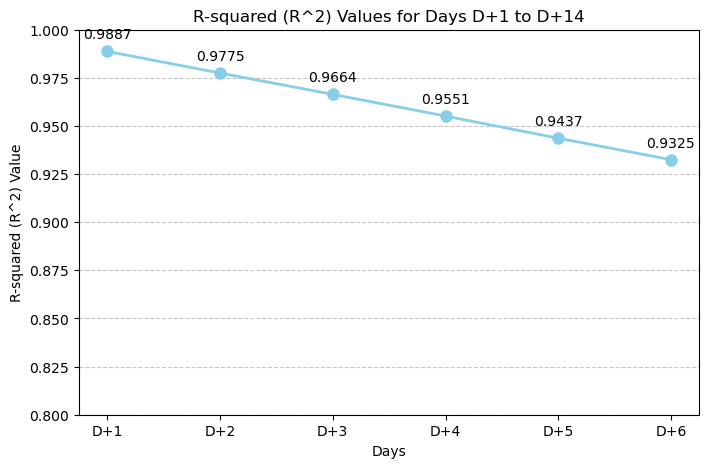

In [38]:
from sklearn.metrics import r2_score

day_shift = 1
day_column = 'close'  # You can change this if needed
actual_values = df['close']
predicted_values = df[day_column].shift(-day_shift)

r_squared = r2_score(actual_values[:-day_shift], predicted_values.dropna())

print(f'R-squared (R^2) for Day D+{day_shift}: {r_squared}')

import matplotlib.pyplot as plt

# Days D+1 to D+6
days = ['D+1', 'D+2', 'D+3', 'D+4', 'D+5', 'D+6']

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(days, r_squared_values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Days')
plt.ylabel('R-squared (R^2) Value')
plt.title('R-squared (R^2) Values for Days D+1 to D+14')
plt.ylim(0.8, 1.0)  # Set y-axis limits if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the R-squared values as labels on the data points
for i, value in enumerate(r_squared_values):
    plt.text(days[i], value + 0.005, f'{value:.4f}', ha='center', va='bottom')

plt.show()


In [39]:
import numpy as np
import scipy.optimize as opt

# Define the objective function to minimize (MSE)
def objective(params):
    predicted = np.dot(X_test, params)
    mse = np.mean((predicted - y_test) ** 2)
    return mse

# Initialize the parameters for optimization (e.g., as all ones)
initial_params = np.ones(len(features))

# Use simulated annealing to optimize the parameters
result = opt.basinhopping(objective, initial_params, niter=100, stepsize=0.5)

# Get the optimized parameters
optimized_params = result.x

# Re-predict using the optimized parameters
y_pred_optimized = np.dot(X_test, optimized_params)

# Calculate the coefficient of determination (R^2) for the optimized predictions
r_squared_optimized = r2_score(y_test, y_pred_optimized)
print(f'R-squared (R^2) after optimization: {r_squared_optimized}')

R-squared (R^2) after optimization: 0.9877898527323037


In [40]:
# Get the latest row from your DataFrame
latest_row = df.iloc[0]

# Extract the predicted exchange rate for today (Day D)
predicted_exchange_rate_today = latest_row['Predicted_Close']

# Extract the predicted exchange rate for tomorrow (Day D+1)
predicted_exchange_rate_tomorrow = df['Predicted_Close'].iloc[1]
predicted_exchange_rate_6_days = df['Predicted_Close'].iloc[14]

print(f'Predicted exchange rate for today (Day D): {predicted_exchange_rate_today}')
print(f'Predicted exchange rate for tomorrow (Day D+1): {predicted_exchange_rate_tomorrow}')

Predicted exchange rate for today (Day D): 0.6309326670713533
Predicted exchange rate for tomorrow (Day D+1): 0.6366658974357214


In [41]:
# Get the latest row from your DataFrame
latest_row = df.iloc[0]

# Extract the predicted exchange rate for today (Day D)
predicted_exchange_rate_today = latest_row['Predicted_Close']

# Extract the predicted exchange rate for tomorrow (Day D+1)
predicted_exchange_rate_tomorrow = df['Predicted_Close'].iloc[1]
predicted_exchange_rate_6_days = df['Predicted_Close'].iloc[2]

print(f'Predicted exchange rate for today (Day D): {predicted_exchange_rate_today}')
print(f'Predicted exchange rate for tomorrow (Day D+1): {predicted_exchange_rate_tomorrow}')
print(f'Predicated exchange rate for 14 days (Day+14): {predicted_exchange_rate_6_days}')

Predicted exchange rate for today (Day D): 0.6309326670713533
Predicted exchange rate for tomorrow (Day D+1): 0.6366658974357214
Predicated exchange rate for 14 days (Day+14): 0.6436793783693039


<AxesSubplot:>

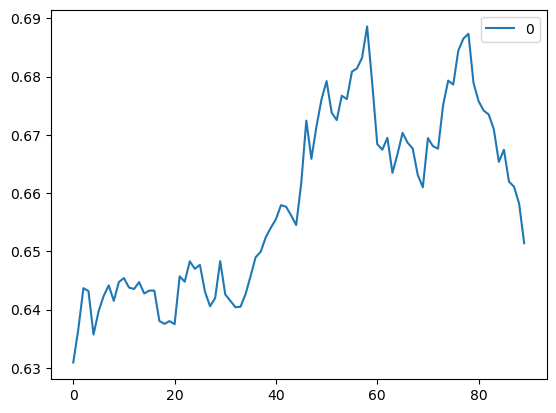

In [42]:
x = []  
bar_count = 90

for i in range(bar_count): 
    a = df['Predicted_Close'].iloc[i]
    x.append(a)  # Now, you're appending to a list

x = pd.DataFrame(x)
x.plot()

<AxesSubplot:>

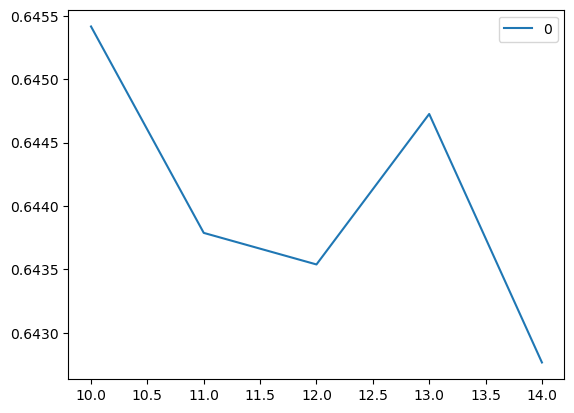

In [49]:
x.iloc[10:15].plot()

In [501]:
df.head()

,Date,close,Close_D-1,Close_D-2,Close_D-3,Close_D-4,Close_D-5,Close_D-6,Two_Week_Avg,One_Month_Avg,RSI,Predicted_Close
0,2023-10-03,1820.34,1827.77,1848.74,1864.80,1874.99,1900.58,1915.78,1894.835000,1910.575000,19.259244,1828.869617
1,2023-10-02,1827.77,1848.74,1864.80,1874.99,1900.58,1915.78,1925.25,1901.107143,1913.143000,20.373251,1848.424892
2,2023-09-29,1848.74,1864.80,1874.99,1900.58,1915.78,1925.25,1919.94,1907.219286,1915.373000,24.013482,1865.198909
3,2023-09-28,1864.80,1874.99,1900.58,1915.78,1925.25,1919.94,1930.36,1912.475714,1916.727333,27.508947,1874.752068
4,2023-09-27,1874.99,1900.58,1915.78,1925.25,1919.94,1930.36,1931.34,1916.356429,1917.545000,30.089473,1899.255611
